# NYPD Motor Vehicle Collision Analysis <a id='Top'></a>

**Student ID**: 100675726  
**Module**: Independent Studies  
**Project Title**: Traffic Accident Analysis in NYC

---

### Overview

This project investigates motor vehicle collisions in New York City using data from the NYC Open Data portal.  
It aims to identify patterns, contributing factors, and high-risk zones through comprehensive data analysis.

The study involves:

- Rigorous data cleaning and transformation  
- Exploratory data analysis across time, location, and vehicle types  
- Statistical testing (ANOVA, Chi-Square, T-Test)  
- Predictive modeling using machine learning (Logistic Regression, Random Forest)  
- Generating insights to support data-driven traffic safety policies

---

### Dataset Summary

The "Motor Vehicle Collisions – Crashes" dataset is maintained by New York City’s Open Data program.  
It contains detailed records of reported crashes across NYC, with variables describing time, location, vehicle types, causes, and resulting injuries or fatalities.

- Data coverage: 2012 to present (updated daily)  
- Current size: Over 1.6 million rows, 29 columns  
- Source: [NYPD Motor Vehicle Collisions – Crashes](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95)

---

This notebook follows a structured approach to import, explore, transform, analyze, and model the data.


### Importing the Data <a id='Importing'></a>

The analysis begins by importing the necessary Python libraries for data processing, visualization, and statistical modeling.  
Subsequently, the notebook loads the first two million rows of the NYPD Motor Vehicle Collision dataset using the `pandas` library.

This row limit is intentionally set above the current dataset size to maintain compatibility with future updates as additional records are added.

In [4]:
# imports numpy for numerical operations and arrays
import numpy as np

# imports pandas for working with dataframes and csv files
import pandas as pd

# imports datetime for handling date and time objects
import datetime as dt

# imports sys for accessing system-specific parameters and functions
import sys

# imports display and HTML tools from IPython to control how dataframes are shown
from IPython.display import display, HTML

In [5]:
# imports pandas for data handling
import pandas as pd

# reads the csv file into a dataframe and disables low memory warning
datanyc = pd.read_csv("NYPD_Collisions.csv", low_memory=False)

# displays the first five rows of the dataframe in a formatted way
display(datanyc.head())

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [6]:
# shows general information about the dataframe including column types and non null values
datanyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170974 entries, 0 to 2170973
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [7]:
before_cleaning = len(datanyc)
print("Rows before cleaning:", before_cleaning)

Rows before cleaning: 2170974


In [8]:
# gets the ip address of the specified host used to confirm network or data source connection
import socket
socket.gethostbyname('data.cityofnewyork.us')

'52.206.68.26'

And let's pull up the data dictionary supplied by the Open Data website for reference.

In [10]:
# reads an excel file from a url containing the data dictionary for the dataset
# selects the 'Column Info' sheet and uses the second row as the header
data_dict = pd.read_excel(
    "https://data.cityofnewyork.us/api/views/h9gi-nx95/files/2e58023a-21a6-4c76-b9e8-0101bf7509ca?download=true&filename=MVCollisionsDataDictionary.xlsx",
    sheet_name='Column Info',
    header=1
)

# shows the first five rows of the data dictionary to understand column meanings
data_dict.head()

,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes \n(where applicable, includes the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and/or information on column source)"
0,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
1,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
2,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
3,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
4,MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN


<br><div style="text-align: right">[Begining of the page](#Top)</div>

### Understanding the Data <a id='Understanding'></a>
Let's look at the first few rows of the dataset.

In [12]:
# sets display option to show all columns when displaying a dataframe
pd.set_option('display.max_columns', None)

# sets display option to limit output to 200 rows to avoid accidental overflow
pd.set_option('display.max_rows', 200)

# shows the first five rows of the dataset
datanyc.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


... And get overall information about the contents of the data. <a id='column_contents'></a>

In [14]:
# increases the limit for rows shown in dataframe info to ensure full structure is displayed
pd.options.display.max_info_rows = 2000000

# displays dataset information including column types and non null counts
datanyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170974 entries, 0 to 2170973
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

Each column should contain approxamitely 1.6 million values, though some columns have considerably fewer entries. Let's find the percentage of the missing values and see which columns have the most amount of missing values. To do so we will get a mean of the missing values and then round it to the second decimal.

In [16]:
# sets the display option to show up to 29 columns at once
pd.set_option('display.max_columns', 29)

# calculates the percentage of missing values in each column rounded to four decimals
datanyc.isnull().mean().round(4) * 100

CRASH DATE                        0.00
CRASH TIME                        0.00
BOROUGH                          30.89
ZIP CODE                         30.91
LATITUDE                         11.05
LONGITUDE                        11.05
LOCATION                         11.05
ON STREET NAME                   21.57
CROSS STREET NAME                38.16
OFF STREET NAME                  82.69
NUMBER OF PERSONS INJURED         0.00
NUMBER OF PERSONS KILLED          0.00
NUMBER OF PEDESTRIANS INJURED     0.00
NUMBER OF PEDESTRIANS KILLED      0.00
NUMBER OF CYCLIST INJURED         0.00
NUMBER OF CYCLIST KILLED          0.00
NUMBER OF MOTORIST INJURED        0.00
NUMBER OF MOTORIST KILLED         0.00
CONTRIBUTING FACTOR VEHICLE 1     0.35
CONTRIBUTING FACTOR VEHICLE 2    15.89
CONTRIBUTING FACTOR VEHICLE 3    92.78
CONTRIBUTING FACTOR VEHICLE 4    98.35
CONTRIBUTING FACTOR VEHICLE 5    99.55
COLLISION_ID                      0.00
VEHICLE TYPE CODE 1               0.71
VEHICLE TYPE CODE 2      

As seen above there are some columns with a lot of missing values.

For some columns it makes sense. After looking at the data dictionary, `contributing_factor_vehicle_2` or `contributing_factor_vehicle_3` seem like they may be missing because there were no second or third contributing factors to the crash.

It looks like `contributing_factor_vehicle_3`, `contributing_factor_vehicle_4`, `contributing_factor_vehicle_5` and `vehicle_type_code_3`, `vehicle_type_code_4`, `vehicle_type_code_5` have very few values compared to the others. This will be looked at carefully at the stage of transforming the data.

For now, the `describe` function will be used to generate some descriptive statistics. This will work on numeric and object series, and may point out any glaring holes in the data. <a id='descriptive_statistics'></a>

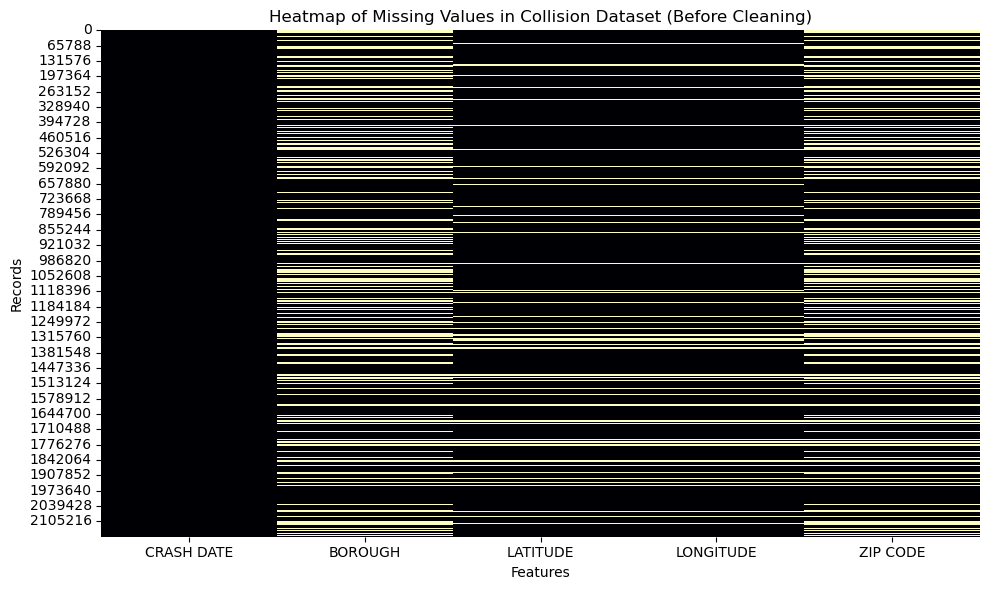

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize missing data before cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(datanyc[['CRASH DATE', 'BOROUGH', 'LATITUDE', 'LONGITUDE', 'ZIP CODE']].isnull(), 
            cbar=False, cmap='magma')
plt.title("Heatmap of Missing Values in Collision Dataset (Before Cleaning)")
plt.xlabel("Features")
plt.ylabel("Records")
plt.tight_layout()
plt.show()

In [19]:
# provides summary statistics for all numerical columns in the dataset
datanyc.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.931102e+06,1.931102e+06,2.170956e+06,2.170943e+06,2.170974e+06,2.170974e+06,2.170974e+06,2.170974e+06,2.170974e+06,2.170974e+06,2.170974e+06
mean,4.061047e+01,-7.372078e+01,3.220623e-01,1.554163e-03,5.873539e-02,7.710825e-04,2.810582e-02,1.220650e-04,2.309079e-01,6.328956e-04,3.230051e+06
std,2.148183e+00,4.012323e+00,7.099734e-01,4.161002e-02,2.483674e-01,2.838125e-02,1.674019e-01,1.108925e-02,6.711692e-01,2.749441e-02,1.507824e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066744e+01,-7.397465e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.178863e+06
50%,4.072043e+01,-7.392693e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.721762e+06
75%,4.076961e+01,-7.386667e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.264732e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.807765e+06


While averages and standard deviations don't give much information about latitude and longitude, they can help confirm the data structure.
Since these fields have fewer entries than expected, it suggests that there is incomplete location information. Which leads to further investigation.

This block will look at some of the empty `latitude` column using the `isnull` function. <a id='empty'></a>

In [21]:
# filters and displays the first 20 rows where the latitude value is missing
datanyc[datanyc['LATITUDE'].isnull()].head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
5,04/26/2023,13:30,NaN,NaN,NaN,NaN,NaN,WEST 54 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4623759,Sedan,Box Truck,NaN,NaN,NaN
6,11/01/2023,7:12,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Driver Inattention/Distraction,NaN,NaN,NaN,4675709,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
7,11/01/2023,8:01,NaN,NaN,NaN,NaN,NaN,WEST 35 STREET,HENRY HUDSON RIVER,NaN,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4675769,Sedan,NaN,NaN,NaN,NaN
8,04/26/2023,22:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 Ed Koch queensborough bridge,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4623865,Sedan,Pick-up Truck,NaN,NaN,NaN
11,04/14/2021,12:47,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN
18,12/14/2021,8:30,NaN,NaN,NaN,NaN,NaN,broadway,west 80 street -west 81 street,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4486634,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


The first 20 rows with missing latitude values were inspected. While these rows lack geospatial coordinates, they shouldn't be deleted, as the injury/fatality data may be useful. For location-based analysis, these rows may be dropped however, including them could be justified in non-spatial statistical evaluations. 

For now, we'll pivot to take a closer look at vehicle types.

In [23]:
# counts the 20 most common values in the vehicle type code 1 column
datanyc['VEHICLE TYPE CODE 1'].value_counts().head(20)

VEHICLE TYPE CODE 1
Sedan                                  619701
Station Wagon/Sport Utility Vehicle    486174
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    54370
4 dr sedan                              40184
Pick-up Truck                           37009
TAXI                                    31911
Box Truck                               25805
VAN                                     25266
Bus                                     23362
OTHER                                   22968
UNKNOWN                                 19938
Bike                                    16804
LARGE COM VEH(6 OR MORE TIRES)          14397
BUS                                     13993
SMALL COM VEH(4 TIRES)                  13216
PICK-UP TRUCK                           11505
Tractor Truck Diesel                    10982
LIVERY VEHICLE                          10481
Name: count, dtype: int64

In [24]:
# counts the 20 most frequent values in the vehicle type code 3 column
datanyc['VEHICLE TYPE CODE 3'].value_counts().head(20)

VEHICLE TYPE CODE 3
Sedan                                  48228
Station Wagon/Sport Utility Vehicle    39216
PASSENGER VEHICLE                      27713
SPORT UTILITY / STATION WAGON          13358
UNKNOWN                                 3284
4 dr sedan                              2564
Pick-up Truck                           2550
Taxi                                    2330
VAN                                     1366
OTHER                                   1045
TAXI                                     980
Box Truck                                952
Bus                                      649
PICK-UP TRUCK                            619
Bike                                     498
LARGE COM VEH(6 OR MORE TIRES)           441
SMALL COM VEH(4 TIRES)                   435
Van                                      434
LIVERY VEHICLE                           424
Motorcycle                               420
Name: count, dtype: int64

The frequency distributions for vehicle type codes 1 and 3 suggest that free text input, as opposed to controlled selection, was most frequently used to capture these fields.  This has led to inconsistent naming and duplicate values (e.g., "Taxi" vs "TAXI").

 Significantly fewer non-null entries are seen in columns outside of `VEHICLE TYPE CODE 1`, which may indicate secondary or tertiary vehicles involved in multi-car accidents.  This is a plausible assumption, even though the data dictionary does not specifically affirm it.

 `VEHICLE TYPE CODE 1` will continue to be the main focus of the `vehicle-type-related` study due to data sparsity in codes 2–5.

 In the following step, the dataset is prepared for confident analysis, missing values are addressed, duplicates are eliminated, and columns are renamed for consistency.

## Transforming the Data <a id='Transforming'></a>
### What needs attention
####  [Dropping Columns](#Drop)
* Some columns (such as `VEHICLE TYPE CODE 4`, `CONTRIBUTING FACTOR VEHICLE 5`) are nearly empty, therefore, they will be removed.
* Some columns will not be used (e.g. `collision_id`, `on_street_name`, `off_street_name`, `cross_street_name`) so they can be dropped completely.


#### [Renaming Data](#Renaming)
* Cleaning and combining duplicate rows
* Renaming some columns
* Correcting misspellings
* Dealing with missing values
* Some dtype changes

#### [Redundant Columns](#Redundant)
* `Latitude` and `longitude` columns seem to be contained in the `location` column. While keeping the two values separate for now, `location` can probably be removed later.

#### [Data Types](#data_type)
* The values that are expected to be a 'datetime' type are an 'object' type (`CRASH DATE` and `CRASH TIME` columns). They will be fixed.
* `ZIP CODE` will be treated as a string to preserve formatting.

#### [Categorizing](#categorizing)
To support seasonal analysis, a new column will be introduced to group crash dates into the following categories:
- **Spring** (March–May)
- **Summer** (June–August)
- **Fall** (September–November)
- **Winter** (December–February)
<br><div style="text-align: right">[Begining of the page](#Top)</div>

## Dropping Columns  <a id='Drop'></a>
To begin some columns will be removed, while keeping only those missing fewer than 30% of their values. Additionally, columns that are not relevant and won't be used will be dropped. Those operations are simple enough that it will be done before going through the DataFrame again.

In [28]:
# drops columns that have more than 70 percent missing values and copies the result into a new dataframe
clean_nyc = datanyc.dropna(thresh=(0.30 * datanyc.shape[0]), axis=1).copy()

In [29]:
# removes specific columns that are not needed for the analysis and ignores errors if any column is missing
clean_nyc.drop(columns=["COLLISION_ID", "ON STREET NAME", "OFF STREET NAME"], inplace=True, errors='ignore')

The updated stucture of 'clean_nyc' is displayed below, as far as data types and number of columns (and values in those columns):

In [31]:
# displays updated information about the dataframe after column removal
clean_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170974 entries, 0 to 2170973
Data columns (total 20 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   CROSS STREET NAME              object 
 8   NUMBER OF PERSONS INJURED      float64
 9   NUMBER OF PERSONS KILLED       float64
 10  NUMBER OF PEDESTRIANS INJURED  int64  
 11  NUMBER OF PEDESTRIANS KILLED   int64  
 12  NUMBER OF CYCLIST INJURED      int64  
 13  NUMBER OF CYCLIST KILLED       int64  
 14  NUMBER OF MOTORIST INJURED     int64  
 15  NUMBER OF MOTORIST KILLED      int64  
 16  CONTRIBUTING FACTOR VEHICLE 1  object 
 17  CONTRIBUTING FACTOR VEHICLE 2  object 
 18  VE

And what about the percentage of the missing values now?

In [33]:
# sets the display limit to show up to 29 columns at once
pd.set_option('display.max_columns', 29)

# calculates the percentage of missing values in each remaining column
clean_nyc.isnull().mean().round(4) * 100

CRASH DATE                        0.00
CRASH TIME                        0.00
BOROUGH                          30.89
ZIP CODE                         30.91
LATITUDE                         11.05
LONGITUDE                        11.05
LOCATION                         11.05
CROSS STREET NAME                38.16
NUMBER OF PERSONS INJURED         0.00
NUMBER OF PERSONS KILLED          0.00
NUMBER OF PEDESTRIANS INJURED     0.00
NUMBER OF PEDESTRIANS KILLED      0.00
NUMBER OF CYCLIST INJURED         0.00
NUMBER OF CYCLIST KILLED          0.00
NUMBER OF MOTORIST INJURED        0.00
NUMBER OF MOTORIST KILLED         0.00
CONTRIBUTING FACTOR VEHICLE 1     0.35
CONTRIBUTING FACTOR VEHICLE 2    15.89
VEHICLE TYPE CODE 1               0.71
VEHICLE TYPE CODE 2              19.77
dtype: float64

So far, so good.

<br><div style="text-align: right">[Transformation Index](#Transforming)</div>
## Correcting Misspellings and Renaming  <a id='Renaming'></a>

To standardize the dataset using the rename function, the column names will be renamed 

In [37]:
# corrects column names by adding underscores for consistency with other variable names
clean_nyc.rename(columns={
    'vehicle_type_code1': 'vehicle_type_code_1',
    'vehicle_type_code2': 'vehicle_type_code_2'
}, inplace=True)

Now looking closer at `VEHICLE TYPE CODE 1`.

In [39]:
# shows the 40 most common values in the vehicle type code 1 column
clean_nyc['VEHICLE TYPE CODE 1'].value_counts().head(40)

VEHICLE TYPE CODE 1
Sedan                                  619701
Station Wagon/Sport Utility Vehicle    486174
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    54370
4 dr sedan                              40184
Pick-up Truck                           37009
TAXI                                    31911
Box Truck                               25805
VAN                                     25266
Bus                                     23362
OTHER                                   22968
UNKNOWN                                 19938
Bike                                    16804
LARGE COM VEH(6 OR MORE TIRES)          14397
BUS                                     13993
SMALL COM VEH(4 TIRES)                  13216
PICK-UP TRUCK                           11505
Tractor Truck Diesel                    10982
LIVERY VEHICLE                          10481
Van                                      9534
Motorcycle    

It looks like there are misspellings and duplicates. Combining some of the obvious misspellings could be a solution:

In [41]:
# creates a dictionary to group and standardize different vehicle type labels under consistent categories
replace_dict = {
    'SPORT UTILITY / STATION WAGON': 'SUV',
    'Station Wagon/Sport Utility Vehicle': 'SUV',
    'TAXI': 'taxi',
    'Bike': 'BICYCLE',
    'VAN': 'Van',
    'Motorscooter': 'SCOOTER',
    'Moped': 'SCOOTER',
    'van': 'Van',
    'MOTORCYCLE': 'Motorcycle',
    'AMBULANCE': 'Ambulance',
    'Refrigerated Van': 'Van',
    'PICK-UP TRUCK': 'Pick-up Truck',
    'Motorbike': 'Motorcycle',
    'AMBUL': 'Ambulance',
    'CAB': 'taxi',
    'Cab': 'taxi',
    'VAN T': 'Van',
    'VAN/T': 'Van',
    'van t': 'Van',
    'Ambul': 'Ambulance',
    'AMB': 'Ambulance',
    'Ambu': 'Ambulance',
    'ambul': 'Ambulance',
    'Fire': 'FIRE TRUCK',
    'fire': 'FIRE TRUCK',
    'FIRE': 'FIRE TRUCK',
    'FIRET': 'FIRE TRUCK',
    'FDNY': 'FIRE TRUCK',
    'Other': 'Unknown',
    'BUS': 'Bus',
    'Box T': 'Box Truck',
    'GARBA': 'Garbage or Refuse',
    'Taxi': 'taxy',
    'taxy': 'taxi',
    'AM': 'Ambulance',
    'VN': 'Van',
    'CONV': 'Convertible',
    'Garbage or Refuse': 'Dump',
    'OTHER': 'UNKNOWN'
}

# replaces inconsistent vehicle type values in the dataset using the dictionary
clean_nyc['VEHICLE TYPE CODE 1'] = clean_nyc['VEHICLE TYPE CODE 1'].replace(replace_dict)

# displays the 50 most frequent cleaned vehicle type values
clean_nyc['VEHICLE TYPE CODE 1'].value_counts().head(50)

VEHICLE TYPE CODE 1
SUV                               666480
Sedan                             619701
PASSENGER VEHICLE                 416206
taxy                               54370
Pick-up Truck                      48514
UNKNOWN                            42906
4 dr sedan                         40184
Bus                                37355
Van                                35753
taxi                               31915
Box Truck                          25811
BICYCLE                            17363
LARGE COM VEH(6 OR MORE TIRES)     14397
Motorcycle                         13883
SMALL COM VEH(4 TIRES)             13216
Tractor Truck Diesel               10982
LIVERY VEHICLE                     10481
Ambulance                           8276
Dump                                6612
Convertible                         4029
E-Bike                              3797
SCOOTER                             3696
PK                                  2754
E-Scooter                           2

Even in one column, the amount of variation there is can be seen. It would've been better if whoever created this dataset turns this from a "fill in the blank" text field to a select field from a predetermined list, to get better data fidelity.

Now looking at `CONTRIBUTING FACTOR VEHICLE 1` and `CONTRIBUTING FACTOR VEHICLE 2`.

In [44]:
# displays all unique values found in the contributing factor vehicle 1 column
clean_nyc['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Aggressive Driving/Road Rage', 'Pavement Slippery', 'Unspecified',
       'Following Too Closely', 'Passing Too Closely',
       'Failure to Yield Right-of-Way', nan, 'Driver Inexperience',
       'Passing or Lane Usage Improper', 'Turning Improperly',
       'Unsafe Lane Changing', 'Unsafe Speed',
       'Reaction to Uninvolved Vehicle', 'Steering Failure',
       'Traffic Control Disregarded', 'Other Vehicular',
       'Driver Inattention/Distraction', 'Accelerator Defective',
       'Oversized Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Alcohol Involvement', 'View Obstructed/Limited', 'Illnes',
       'Lost Consciousness', 'Brakes Defective', 'Backing Unsafely',
       'Glare', 'Passenger Distraction', 'Fell Asleep',
       'Obstruction/Debris', 'Tinted Windows', 'Animals Action',
       'Drugs (illegal)', 'Pavement Defective', 'Other Lighting Defects',
       'Outside Car Distraction', 'Driverless/Runaway Vehicle',
       'Tire Failure/

In [45]:
# lists all unique values in the contributing factor vehicle 2 column to inspect secondary causes
clean_nyc['CONTRIBUTING FACTOR VEHICLE 2'].unique()

array(['Unspecified', nan, 'Driver Inattention/Distraction',
       'Other Vehicular', 'Traffic Control Disregarded',
       'Passing or Lane Usage Improper', 'Reaction to Uninvolved Vehicle',
       'Following Too Closely', 'Unsafe Speed',
       'Aggressive Driving/Road Rage', 'Turning Improperly',
       'Failure to Yield Right-of-Way', 'Driver Inexperience',
       'View Obstructed/Limited', 'Oversized Vehicle',
       'Passing Too Closely', 'Unsafe Lane Changing', 'Pavement Slippery',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Fell Asleep', 'Backing Unsafely', 'Obstruction/Debris',
       'Alcohol Involvement', 'Outside Car Distraction',
       'Passenger Distraction', 'Glare', 'Vehicle Vandalism',
       'Traffic Control Device Improper/Non-Working', 'Tinted Windows',
       'Tow Hitch Defective', 'Brakes Defective', 'Steering Failure',
       'Pavement Defective', 'Failure to Keep Right',
       'Driverless/Runaway Vehicle', 'Drugs (illegal)', 'Fatig

They have similar factors and there seem to be a lot of unique values. For simplicity and clarity, this project will focus exclusively on `CONTRIBUTING FACTOR VEHICLE 1`.

Categorisation will be performed in `CONTRIBUTING FACTOR VEHICLE 1` to make the analysis a little bit easier.

In [47]:
# shows all unique values from the original column name with uppercase and spaces
clean_nyc['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Aggressive Driving/Road Rage', 'Pavement Slippery', 'Unspecified',
       'Following Too Closely', 'Passing Too Closely',
       'Failure to Yield Right-of-Way', nan, 'Driver Inexperience',
       'Passing or Lane Usage Improper', 'Turning Improperly',
       'Unsafe Lane Changing', 'Unsafe Speed',
       'Reaction to Uninvolved Vehicle', 'Steering Failure',
       'Traffic Control Disregarded', 'Other Vehicular',
       'Driver Inattention/Distraction', 'Accelerator Defective',
       'Oversized Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Alcohol Involvement', 'View Obstructed/Limited', 'Illnes',
       'Lost Consciousness', 'Brakes Defective', 'Backing Unsafely',
       'Glare', 'Passenger Distraction', 'Fell Asleep',
       'Obstruction/Debris', 'Tinted Windows', 'Animals Action',
       'Drugs (illegal)', 'Pavement Defective', 'Other Lighting Defects',
       'Outside Car Distraction', 'Driverless/Runaway Vehicle',
       'Tire Failure/

The entries `'80'` and `'1'` do not convey meaningful information and are removed from the dataset.  
Similarly, rows containing `'Unspecified'` or missing values are excluded to ensure a more informative and accurate analysis.  
This also enhances the clarity of subsequent visualisations and statistical summaries.

In [49]:
# simplifies and groups related contributing factors under broader categories for analysis
clean_nyc['CONTRIBUTING FACTOR VEHICLE 1'] = clean_nyc['CONTRIBUTING FACTOR VEHICLE 1'].replace({
    'Backing Unsafely': 'Traffic Recklessness',
    'Unsafe Speed': 'Traffic Recklessness',
    'Passing or Lane Usage Improper': 'Traffic Recklessness',
    'Turning Improperly': 'Traffic Recklessness',
    'Following Too Closely': 'Traffic Recklessness',
    'Passing Too Closely': 'Traffic Recklessness',
    'Outside Car Distraction': 'Traffic Recklessness',
    'Steering Failure': 'Traffic Recklessness',
    'Reaction to Uninvolved Vehicle': 'Traffic Recklessness',
    'Traffic Control Disregarded': 'Traffic Recklessness',
    'Failure to Yield Right-of-Way': 'Traffic Recklessness',
    'Aggressive Driving/Road Rage': 'Traffic Recklessness',
    'Unsafe Lane Changing': 'Traffic Recklessness',
    'Driver Inexperience': 'Traffic Recklessness',

    'Passenger Distraction': 'Driver Inattention/Distraction',
    'Failure to Keep Right': 'Driver Inattention/Distraction',
    'Eating or Drinking': 'Driver Inattention/Distraction',
    'Animals Action': 'Driver Inattention/Distraction',
    'Using On Board Navigation Device': 'Driver Inattention/Distraction',
    'Reaction to Other Uninvolved Vehicle': 'Driver Inattention/Distraction',
    'Cell Phone (hands-free)': 'Driver Inattention/Distraction',
    'Cell Phone (hand-Held)': 'Driver Inattention/Distraction',
    'Cell Phone (hand-held)': 'Driver Inattention/Distraction',
    'Other Electronic Device': 'Driver Inattention/Distraction',
    'Texting': 'Driver Inattention/Distraction',
    'Listening/Using Headphones': 'Driver Inattention/Distraction',
    'Fatigued/Drowsy': 'Driver Inattention/Distraction',
    'Fell Asleep': 'Driver Inattention/Distraction',

    'Brakes Defective': 'Car Defects',
    'Tinted Windows': 'Car Defects',
    'Tire Failure/Inadequate': 'Car Defects',
    'Tow Hitch Defective': 'Car Defects',
    'Headlights Defective': 'Car Defects',
    'Accelerator Defective': 'Car Defects',
    'Windshield Inadequate': 'Car Defects',
    'Driverless/Runaway Vehicle': 'Car Defects',
    'Oversized Vehicle': 'Car Defects',

    'Glare': 'Road Defects',
    'Tinted Windows': 'Road Defects',
    'Lane Marking Improper/Inadequate': 'Road Defects',
    'View Obstructed/Limited': 'Road Defects',
    'Pavement Defective': 'Road Defects',
    'Other Lighting Defects': 'Road Defects',
    'Obstruction/Debris': 'Road Defects',
    'Traffic Control Device Improper/Non-Working': 'Road Defects',
    'Shoulders Defective/Improper': 'Road Defects',
    'Pavement Slippery': 'Road Defects',

    'Illnes': 'Illness',
    'Lost Consciousness': 'Illness',
    'Physical Disability': 'Illness',
    'Prescription Medication': 'Illness',

    'Drugs (illegal)': 'Drugs (Illegal)',
    'Alcohol Involvement': 'Drugs (Illegal)',

    'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Outside Error',
    'Vehicle Vandalism': 'Outside Error',
    'Other Vehicular': 'Outside Error'
})

In [50]:
# finds and drops rows where the contributing factor is incorrectly marked as 80
nyc80 = clean_nyc[clean_nyc['CONTRIBUTING FACTOR VEHICLE 1'] == '80'].index
clean_nyc.drop(nyc80, inplace=True)

# finds and drops rows where the contributing factor is incorrectly marked as 1
nyc1 = clean_nyc[clean_nyc['CONTRIBUTING FACTOR VEHICLE 1'] == '1'].index
clean_nyc.drop(nyc1, inplace=True)

# finds and drops rows where the contributing factor is marked as unspecified
dropunspecified = clean_nyc[clean_nyc['CONTRIBUTING FACTOR VEHICLE 1'] == 'Unspecified'].index
clean_nyc.drop(dropunspecified, inplace=True)

# drops rows where the contributing factor column is completely empty
clean_nyc.dropna(subset=['CONTRIBUTING FACTOR VEHICLE 1'], how='all', inplace=True)

# checks the remaining unique values in the contributing factor column
clean_nyc['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Traffic Recklessness', 'Road Defects', 'Outside Error',
       'Driver Inattention/Distraction', 'Car Defects', 'Drugs (Illegal)',
       'Illness'], dtype=object)

Next, some columns will be renambed to make things easier while analyzing the data.

In [52]:
# renames injury and fatality related columns to shorter and clearer names for readability
clean_nyc.rename(columns={
    'number_of_persons_injured': 'persons_injured',
    'number_of_persons_killed': 'persons_killed',
    'number_of_pedestrians_injured': 'pedestrians_injured',
    'number_of_pedestrians_killed': 'pedestrians_killed',
    'number_of_cyclist_injured': 'cyclist_injured',
    'number_of_cyclist_killed': 'cyclist_killed',
    'number_of_motorist_injured': 'motorist_injured',
    'number_of_motorist_killed': 'motorist_killed'
}, inplace=True)

# displays the first five rows of the updated dataframe
clean_nyc.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,20 AVENUE,2.0,0.0,0,0,0,0,2,0,Traffic Recklessness,Unspecified,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Road Defects,NaN,Sedan,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Traffic Recklessness,Unspecified,Sedan,Pick-up Truck
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Traffic Recklessness,Unspecified,SUV,NaN
6,11/01/2023,7:12,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Traffic Recklessness,Driver Inattention/Distraction,Sedan,Station Wagon/Sport Utility Vehicle


Next, to ensure consistency in categorical variables, all text values will be converted to lowercase.  
This standardisation simplifies string comparisons and improves the reliability of grouping operations.

In [ ]:
# creates a copy of the cleaned dataframe to work on separately
clean_nyc1 = clean_nyc.copy()

# converts all column names to lowercase and replaces spaces with underscores for consistency
clean_nyc1.columns = clean_nyc1.columns.str.lower().str.replace(' ', '_')

# converts all text data in string columns to lowercase for uniformity
for col in clean_nyc1.select_dtypes(include='object').columns:
    clean_nyc1[col] = clean_nyc1[col].map(lambda s: s.lower() if isinstance(s, str) else s)

# shows the first five rows of the updated dataframe
clean_nyc1.head()

### Renaming Columns for Clarity
To make the dataset easier to read and work with, the columns were renamed using more intuitive and simplified names. This improves code readability and supports cleaner analysis later.

In [ ]:
# Rename columns for better readability
clean_nyc1 = clean_nyc1.rename(columns={
    "crash_date": "date",
    "crash_time": "time",
    "borough": "borough",
    "zip_code": "zip",
    "latitude": "lat",
    "longitude": "lon",
    "location": "location",
    "on_street_name": "street_on",
    "cross_street_name": "street_cross",
    "off_street_name": "street_off",
    "number_of_persons_injured": "injured_persons",
    "number_of_persons_killed": "killed_persons",
    "number_of_pedestrians_injured": "injured_pedestrians",
    "number_of_pedestrians_killed": "killed_pedestrians",
    "number_of_cyclist_injured": "injured_cyclists",
    "number_of_cyclist_killed": "killed_cyclists",
    "number_of_motorist_injured": "injured_motorists",
    "number_of_motorist_killed": "killed_motorists",
    "contributing_factor_vehicle_1": "factor_1",
    "contributing_factor_vehicle_2": "factor_2",
    "contributing_factor_vehicle_3": "factor_3",
    "contributing_factor_vehicle_4": "factor_4",
    "contributing_factor_vehicle_5": "factor_5",
    "collision_id": "collision_id",
    "vehicle_type_code_1": "vehicle_type_1",
    "vehicle_type_code_2": "vehicle_type_2",
    "vehicle_type_code_3": "vehicle_type_3",
    "vehicle_type_code_4": "vehicle_type_4",
    "vehicle_type_code_5": "vehicle_type_5"
})

<br><div style="text-align: right">[Transformation Index](#Transforming)</div>
## Redundant Columns: 'latitude' and 'longitude' <a id='Redundant'></a>

It is suspected that the `location` column is simply a concatenation of the `latitude` and `longitude` columns. To gather information about it, its possible to check the data dictionary as shown below:

In [ ]:
# displays rows 5 to 7 from the data dictionary dataframe for reference
data_dict[5:8]

The data dictionary describes `LOCATION` as a "Latitude, Longitude pair", suggesting it duplicates the `LATITUDE` and `LONGITUDE` columns.  
Further verification is needed before deciding to remove it.

In [ ]:
# displays the first 30 rows of lat, lon, and location columns
clean_nyc1[["lat", "lon", "location"]].head(30)

A visual inspection confirms that `LOCATION` replicates the structure of `LATITUDE` and `LONGITUDE`.  
Before proceeding with column removal, a more comprehensive check is performed to ensure formatting consistency across all rows:

In [ ]:
# checks how many location values match a specific point format using a regular expression
clean_nyc1['location'].str.match(r'POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False).value_counts()

1,432,680 rows do not match the expected coordinate format in the `LOCATION` column — significantly more than anticipated.  
A closer inspection is needed to understand this inconsistency.

In [ ]:
# filters and displays rows where the location does not match the expected point format
clean_nyc1[~clean_nyc1['location'].str.match(r'POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)

Many of the non-matching `location` values are missing (`NaN`), aligning with earlier observations about incomplete coordinate data.  
Since `location` appears to be a duplicate of the `lat` and `lon` fields and contains inconsistent formatting, it is safe to remove it.

In [ ]:
# removes the location column from the dataframe as it no longer matches the expected format
clean_nyc1.drop(columns="location", inplace=True)

Below is the cleaned version after dropping `location`

In [ ]:
# displays the first five rows of the cleaned dataframe to review changes
clean_nyc1.head()

<br><div style="text-align: right">[Transformation Index](#Transforming)</div>
## Data Type <a id='data_type'></a>

Now looking at the dates to make sure they are all in the same format:

In [ ]:
# displays the first five rows of the updated column names
clean_nyc1[['date', 'time']].head()

The `crash_date` column is in string format and needs to be converted to a proper datetime type for accurate analysis.

In [ ]:
# converts the 'date' column to datetime format for easier manipulation and analysis
clean_nyc1['date'] = pd.to_datetime(clean_nyc1['date'])

# displays the first five rows to confirm the date format conversion
clean_nyc1.head()

A column with only the hour should be created. It could be helpful when grouping the times and visualising the data. We will create a new column called `hour` in which there will that will have hours instead of hours and minutes.

In [ ]:
# converts the 'time' column to datetime format using the expected format HH:MM
clean_nyc1['time'] = pd.to_datetime(clean_nyc1['time'], format='%H:%M', errors='coerce')

# extracts the hour from the 'time' column for analysis
clean_nyc1['hour'] = clean_nyc1['time'].dt.hour

# displays the first five rows to confirm the changes
clean_nyc1.head()

The `zip` column was converted to string type to preserve formatting consistency, especially for ZIP codes with leading zeros.

In [ ]:
# converts the 'zip' column to string type for consistency
clean_nyc1.loc[:, 'zip'] = clean_nyc1['zip'].astype(str)

# Total Collisions by Year Chart

In [ ]:
# Step: Convert 'CRASH DATE' to datetime
datanyc['CRASH DATE'] = pd.to_datetime(datanyc['CRASH DATE'], errors='coerce')

# Extract year
datanyc['YEAR'] = datanyc['CRASH DATE'].dt.year

# Group by year and count collisions
yearly_counts = datanyc.groupby('YEAR').size()

# Plot
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title("Total Motor Vehicle Collisions per Year")
plt.xlabel("Year")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# NYC Crash Map

In [ ]:
# Drop rows with missing coordinates
geo_data = datanyc.dropna(subset=["LATITUDE", "LONGITUDE"])

# Optional: sample for performance
geo_sample = geo_data.sample(n=1000, random_state=42)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(geo_sample["LONGITUDE"], geo_sample["LATITUDE"], alpha=0.5, s=10, color='crimson')
plt.title("NYC Motor Vehicle Collision Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly Collision Trend Line Graph

In [ ]:
# Group by month and count total collisions
datanyc['CRASH DATE'] = pd.to_datetime(datanyc['CRASH DATE'], errors='coerce')
monthly = datanyc.resample('M', on='CRASH DATE').size()

# Plot
plt.figure(figsize=(10, 6))
monthly.plot(color='darkgreen')
plt.title("Monthly Trend of Motor Vehicle Collisions in NYC")
plt.xlabel("Date")
plt.ylabel("Number of Collisions")
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Chart of Collisions per Borough

In [ ]:
# Count total collisions per borough
borough_counts = datanyc['BOROUGH'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
borough_counts.plot(kind='bar', color='royalblue')
plt.title("Total Collisions by NYC Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Collisions")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<br><div style="text-align: right">[Transformation Index](#Transforming)</div>
## Categorizing<a id='categorizing'></a>: Making a Seasons Variable

Next step would be adding a variable that shows the season in which a crash occurred.

In [ ]:
# extracts the month from the 'date' column
clean_nyc1['date'].dt.month.head(30)

In [ ]:
# defines a function to categorize a date into a season based on the month
def season(date):
    if date.month in ([3, 4, 5]):
        val = 'Spring'
    elif date.month in ([6, 7, 8]):
        val = 'Summer'
    elif date.month in ([9, 10, 11]):
        val = 'Autumn'
    elif date.month in ([12, 1, 2]):
        val = 'Winter'
    else:
        val = "Unspecified"
    return val

# applies the season function to the 'date' column and creates a new 'season' column
clean_nyc1['season'] = clean_nyc1['date'].apply(season)

In [ ]:
# counts the occurrences of each season in the season column for summary
clean_nyc1['season'].value_counts()

Before moving on to the analysis of the dataset, it would be preferred to take a quick look at the difference of the work made so far.

In [ ]:
# shows the shape (rows, columns) of the original dataset
datanyc.shape

In [ ]:
# shows the shape (rows, columns) of the cleaned dataset to compare
clean_nyc1.shape

The original data included over `2.1 million` rows and `29 columns`. After cleaning, it was reduced to `1.43 million rows` and `21 columns`.
This significant reduction improves clarity and removes unnecessary information.
Below is a preview of the cleaned dataset.

In [ ]:
# displays the first five rows of the cleaned dataset to check final changes
clean_nyc1.head()

In [ ]:
# displays general info about the cleaned dataset including column types and non-null counts
clean_nyc1.info()

The dataset has been cleaned, renamed, and reduced to 21 columns. It now includes standardized types and structured fields such as `injury counts`, `vehicle types`, and `contributing factors`.
To save a local copy of the cleaned data, remove the `#` from the line below and run the code cell.

In [ ]:
# saves the cleaned dataset as a CSV file (this line is commented out, but can be used when ready)
# clean_nyc1.to_csv("nyc_crash_data.csv", index=False)

<br><div style="text-align: right">[Begining of the page](#Top)</div>

# Analyzing the data <a id='Analyzing'></a>

To see how many cyclists, pedestrians and motorists were killed in all of our crashes, first, a dataframe will be created that extracts the rows where fatalities occurred. Then the same process will be used to extract the different categories of people, as defined by the data dictionary, and create a new column which creates a cumulative sum of the number of people killed.

In [ ]:
# filters the dataset to get only rows where at least one person was killed
lethal_crashes = clean_nyc1[clean_nyc1['killed_persons'] > 0]

# displays the first five rows of the filtered dataset
lethal_crashes.head()

In [ ]:
# groups lethal crashes by date and borough, then sums the number of motorists killed
killed_motorists = lethal_crashes.groupby(['date', 'borough'])['killed_motorists'].sum().reset_index()  # changed column name to 'killed_motorists'
# calculates the cumulative sum of killed motorists over time
killed_motorists['sum'] = killed_motorists['killed_motorists'].cumsum()  # adjusted to match column name

# groups lethal crashes by date and borough, then sums the number of cyclists killed
killed_cyclist = lethal_crashes.groupby(['date', 'borough'])['killed_cyclists'].sum().reset_index()  # changed column name to 'killed_cyclists'
# calculates the cumulative sum of killed cyclists over time
killed_cyclist['sum'] = killed_cyclist['killed_cyclists'].cumsum()  # adjusted to match column name

# groups lethal crashes by date and borough, then sums the number of pedestrians killed
killed_pedestrians = lethal_crashes.groupby(['date', 'borough'])['killed_pedestrians'].sum().reset_index()  # changed column name to 'killed_pedestrians'
# calculates the cumulative sum of killed pedestrians over time
killed_pedestrians['sum'] = killed_pedestrians['killed_pedestrians'].cumsum()  # adjusted to match column name

# groups lethal crashes by date and borough, then sums the total number of persons killed
killed_persons = lethal_crashes.groupby(['date', 'borough'])['killed_persons'].sum().reset_index()  # changed column name to 'killed_persons'
# calculates the cumulative sum of killed persons over time
killed_persons['sum'] = killed_persons['killed_persons'].cumsum()  # adjusted to match column name


We will now display the last line of each of these data sets to find out how many people were killed.

In [ ]:
# displays the last row of the killed_motorists dataframe to see the final cumulative total
killed_motorists.tail(1)

In [ ]:
# displays the last row of the killed_pedestrians dataframe to see the final cumulative total
killed_pedestrians.tail(1)

In [ ]:
# displays the last row of the killed_cyclist dataframe to see the final cumulative total
killed_cyclist.tail(1)

In [ ]:
# displays the last row of the killed_persons dataframe to see the final cumulative total
killed_persons.tail(1)

The last row of each summary dataset shows the final cumulative total of fatalities for each category.

Based on the totals, pedestrian fatalities appear higher than those of motorists or cyclists. Note that these figures do not reflect population size or exposure rates.

The summed values of killed pedestrians, cyclists, and motorists do not exactly match the total count of killed persons. This small discrepancy likely results from minor inconsistencies in data entry or reporting.

Now checking for crashes that involved injuries. The dataset is filtered to keep only rows where at least one person was injured.

The `borough` column is not needed for this part, so it can be ignored in later steps.

In [ ]:
# filters the dataset to get only rows where at least one person was injured
crashes_with_injuries = clean_nyc1[clean_nyc1['injured_persons'] > 0]

# displays the first five rows of the filtered dataset
crashes_with_injuries.head()

In [ ]:
# groups crashes with injuries by date and sums the number of motorists injured
injured_motorists = crashes_with_injuries.groupby('date')['injured_motorists'].sum().reset_index()
# calculates the cumulative sum of injured motorists over time
injured_motorists['sum'] = injured_motorists['injured_motorists'].cumsum()

# groups crashes with injuries by date and sums the number of cyclists injured
injured_cyclist = crashes_with_injuries.groupby('date')['injured_cyclists'].sum().reset_index()
# calculates the cumulative sum of injured cyclists over time
injured_cyclist['sum'] = injured_cyclist['injured_cyclists'].cumsum()

# groups crashes with injuries by date and sums the number of pedestrians injured
injured_pedestrians = crashes_with_injuries.groupby('date')['injured_pedestrians'].sum().reset_index()
# calculates the cumulative sum of injured pedestrians over time
injured_pedestrians['sum'] = injured_pedestrians['injured_pedestrians'].cumsum()

# groups crashes with injuries by date and sums the total number of persons injured
injured_persons = crashes_with_injuries.groupby('date')['injured_persons'].sum().reset_index()
# calculates the cumulative sum of injured persons over time
injured_persons['sum'] = injured_persons['injured_persons'].cumsum()

In [ ]:
# displays the last row of the injured_motorists dataframe to see the final cumulative total
injured_motorists.tail(1)

In [ ]:
# displays the last row of the injured_pedestrians dataframe to see the final cumulative total
injured_pedestrians.tail(1)

In [ ]:
# displays the last row of the injured_cyclist dataframe to see the final cumulative total
injured_cyclist.tail(1)

In [ ]:
# displays the last row of the injured_persons dataframe to see the final cumulative total
injured_persons.tail(1)

Motorists appear to be injured about four times more often than pedestrians in crashes.  
This trend is different from the fatality data, where pedestrians were more likely to be killed than motorists.

This section checks which boroughs report the most crash incidents.

In [ ]:
# counts the number of occurrences of each borough in the dataset
clean_nyc1['borough'].value_counts()

Brooklyn reports the highest number of crashes. The Bronx and Staten Island have notably fewer incidents.

The next step is to identify the most common contributing factors to crashes.

In [ ]:
# counts the occurrences of each contributing factor in the factor_1 column
clean_nyc1['factor_1'].value_counts()

The leading causes of crashes are `traffic recklessness` and `driver inattention` or `distraction`.

To analyze vehicle types involved in crashes caused by driver inattention or distraction, a new dataset is created by filtering for those cases.

In [ ]:
# filters the dataset to get only rows where driver inattention/distraction was the contributing factor
contributing_factor_inattention = clean_nyc1[clean_nyc1['factor_1'] == "driver inattention/distraction"].copy()

# displays the first five rows of the filtered dataset
contributing_factor_inattention.head()

Now we can see which vehicles have the 'Driver Inattention' factor most frequently.

In [ ]:
# counts the 30 most common vehicle types where driver inattention/distraction was the contributing factor
contributing_factor_inattention['vehicle_type_1'].value_counts().head(30)

`SUVs` and `sedans` are the most frequently involved vehicle types in crashes caused by driver inattention or distraction. `Passenger vehicles` follow behind.

# Statistical Analysis <a id='statistical_analysis'></a>
The analysis uncovered a lot of interesting points, but at a glance, it's hard to tell whether this was simply due to chance. Was it random variation that revealed these points of interest, or are the differences actually significant? To find out, some statistical analyses will be performed:

   - [ANOVA](#anova)
   - [2 Sample T-Test](#2ttest)
   - [Chi-Square](#chi-sq)
<br><div style="text-align: right">[Begining of the page](#Top)</div>
## ANOVA <a id='anova'></a>

The analysis begins by examining whether there is a difference between the number of deaths by borough for persons, pedestrians, motorists, and cyclists. A one-way ANOVA test will be used since there are more than two boroughs (more than two nominal variables).

First, the `persons_killed` column will be cleaned by dropping NaN values to prepare for the ANOVA test.

### Checking Data Availability for Each Borough
Before performing the ANOVA test, it's important to check how many valid entries exist for the 'killed_persons' column in each borough. This will help to identify any boroughs with insufficient data.

In [ ]:
# Check how many rows exist for each borough in the 'killed_persons' column
borough_counts = clean_nyc1.groupby('borough')['killed_persons'].count()
print(borough_counts)

### Excluding Empty Boroughs from ANOVA

To ensure the ANOVA test runs correctly, only boroughs with valid data in the `killed_persons` column are included.  
Boroughs with zero non-null entries are excluded to prevent computational errors during the analysis.

In [ ]:
from scipy import stats 

# Check for how many valid rows exist for each borough and 'killed_persons' column
borough_counts = clean_nyc1.groupby('borough')['killed_persons'].count()

# Display borough counts
print(borough_counts)

# Only include boroughs with more than 0 rows of 'killed_persons'
valid_boroughs = borough_counts[borough_counts > 0].index.tolist()

# Perform ANOVA with only valid boroughs
anova_data = [clean_nyc1[['killed_persons']][clean_nyc1['borough'] == borough] for borough in valid_boroughs]

# Perform the ANOVA test
result = stats.f_oneway(*anova_data)

# Display the result
print(result)

### Performing ANOVA Test

After confirming that all boroughs have valid data, an ANOVA test is used to assess whether there is a statistically significant difference in the number of persons killed across boroughs.

In [ ]:
# drops rows where the 'killed_persons' column has missing values (NaN)
clean_nyc1.dropna(subset=['killed_persons'], how='all', inplace=True)

# performs an ANOVA test to check if there's a significant difference in the number of persons killed across different boroughs
stats.f_oneway(
    clean_nyc1[['killed_persons']][clean_nyc1['borough'] == "manhattan"],
    clean_nyc1[['killed_persons']][clean_nyc1['borough'] == "staten island"],
    clean_nyc1[['killed_persons']][clean_nyc1['borough'] == "bronx"],
    clean_nyc1[['killed_persons']][clean_nyc1['borough'] == "queens"],
    clean_nyc1[['killed_persons']][clean_nyc1['borough'] == "brooklyn"]
)

Our p-value is less than 0.05, which means that it is statistically significant. There seems to be a difference between the number of persons killed by borough.

In [ ]:
from scipy import stats

# Create dictionary of groups using correct column name
groups = {
    borough: clean_nyc1.loc[clean_nyc1['borough'] == borough, 'killed_motorists']
    for borough in ["manhattan", "staten island", "bronx", "queens", "brooklyn"]
}

# Filter out empty groups
non_empty_groups = [g for g in groups.values() if len(g) > 0]

# Run ANOVA
stats.f_oneway(*non_empty_groups)

The resulting p-value is significantly lower than 0.05, indicating a statistically significant difference in the number of motorists killed across boroughs.

The null hypothesis assumed equal mean values for all boroughs. Given the result, this assumption is highly unlikely, and at least one borough differs from the others in terms of motorist fatalities.

Our p-value is greater than 0.05, which means that it is not statistically significant. There seems to be no difference in the mean number of cyclists killed by borough.

In [ ]:
# performs an ANOVA test to compare the number of pedestrians killed across different boroughs
stats.f_oneway(
    clean_nyc1[['killed_pedestrians']][clean_nyc1['borough'] == "manhattan"],
    clean_nyc1[['killed_pedestrians']][clean_nyc1['borough'] == "staten island"],
    clean_nyc1[['killed_pedestrians']][clean_nyc1['borough'] == "bronx"],
    clean_nyc1[['killed_pedestrians']][clean_nyc1['borough'] == "queens"],
    clean_nyc1[['killed_pedestrians']][clean_nyc1['borough'] == "brooklyn"]  # lowercase "brooklyn"
)

In [ ]:
from scipy import stats

# performs an ANOVA test to compare the number of cyclists killed across different boroughs
stats.f_oneway(
    clean_nyc1[['killed_cyclists']][clean_nyc1['borough'] == "manhattan"],
    clean_nyc1[['killed_cyclists']][clean_nyc1['borough'] == "staten island"],
    clean_nyc1[['killed_cyclists']][clean_nyc1['borough'] == "bronx"],
    clean_nyc1[['killed_cyclists']][clean_nyc1['borough'] == "queens"],
    clean_nyc1[['killed_cyclists']][clean_nyc1['borough'] == "brooklyn"]
)

The ANOVA test for cyclist fatalities yields a p-value greater than 0.05, indicating no statistically significant difference across boroughs.  
Similarly, the p-value for pedestrian fatalities also exceeds 0.05, suggesting no meaningful variation between boroughs in that category.

In summary, statistically significant differences exist in the number of persons and motorists killed across boroughs,  
while the differences for pedestrians and cyclists are not significant.

Let's also see whether there is a difference in the numbers of persons killed by season.

In [ ]:
# displays all unique values in the 'season' column to inspect the categories of seasons
clean_nyc1.season.unique()

In [ ]:
from scipy import stats

# prints column names to confirm 'killed_persons' and 'season' are present
print(clean_nyc1.columns)

# performs an ANOVA test to compare number of persons killed across different seasons
stats.f_oneway(
    clean_nyc1.loc[clean_nyc1['season'] == 'Autumn', 'killed_persons'],
    clean_nyc1.loc[clean_nyc1['season'] == 'Spring', 'killed_persons'],
    clean_nyc1.loc[clean_nyc1['season'] == 'Summer', 'killed_persons'],
    clean_nyc1.loc[clean_nyc1['season'] == 'Winter', 'killed_persons']
)

The ANOVA test returned a p-value of 0.0026, which is below the standard 0.05 threshold. This result indicates a statistically significant difference in the number of persons killed across different seasons.
While the ANOVA confirms that a difference exists, it does not identify which specific seasons differ. Further comparison tests are required to determine where the variation lies.


<br><div style="text-align: right">[Statistical Analysis Index](#statistical_analysis)</div>
## Two-Sample T-Tests <a id='2ttest'></a>

A two-sample t-test is used to assess whether the mean number of motorists killed differs significantly between Manhattan and Staten Island. This test assumes that the distribution of values in each group follows a normal distribution. The goal is to determine whether the observed difference between means is statistically meaningful.

In [ ]:
from scipy import stats

# performs an independent t-test to compare the number of motorists killed between Manhattan and Staten Island
stats.ttest_ind(
    clean_nyc1[clean_nyc1['borough'] == 'manhattan']['killed_motorists'],
    clean_nyc1[clean_nyc1['borough'] == 'staten island']['killed_motorists'],
    equal_var=False  # safer when sample sizes or variances differ
)

The resulting statistic represents the standardized distance between the two group means. The p-value is extremely small, indicating a statistically significant difference between Manhattan and Staten Island.

In [ ]:
from scipy import stats

# performs an independent t-test to compare the number of motorists killed between Brooklyn and Staten Island
stats.ttest_ind(
    clean_nyc1[clean_nyc1['borough'] == 'brooklyn']['killed_motorists'],
    clean_nyc1[clean_nyc1['borough'] == 'staten island']['killed_motorists'],
    equal_var=False  # use this for unequal group sizes or variances
)

Since the p-value is less than 0.05, the result is statistically significant. The null hypothesis is that the mean number of motorists killed is the same in both boroughs — can be rejected.  
A comparison between Queens and Manhattan is now examined.

In [ ]:
from scipy import stats

# performs an independent t-test to compare the number of motorists killed between Queens and Manhattan
stats.ttest_ind(
    clean_nyc1[clean_nyc1['borough'] == 'queens']['killed_motorists'],
    clean_nyc1[clean_nyc1['borough'] == 'manhattan']['killed_motorists'],
    equal_var=False  # safer when sample sizes or variances differ
)

This time, the p-value is even smaller, confirming a statistically significant difference between Queens and Manhattan.
Although there is a measurable difference, it is important to assess the practical significance.  To do this, Cohen’s d is used to calculate the effect size between groups.  

The first comparison examines motorists killed in Manhattan versus Queens.

In [ ]:
from numpy import var, mean
from math import sqrt

# defines a function to calculate Cohen's d, which measures the effect size between two groups
def cohens_d(first, second):
    # calculates variance for both groups (using ddof=1 for sample variance)
    s1, s2 = var(first, ddof=1), var(second, ddof=1)
    # calculates pooled standard deviation
    std = sqrt(((len(first) - 1) * s1 + (len(second) - 1) * s2) / (len(first) + len(second) - 2))
    # returns Cohen's d effect size (mean difference divided by pooled standard deviation)
    return (mean(first) - mean(second)) / std

In [ ]:
# defines the cohens_d function if not already defined, which calculates the effect size between two groups
def cohens_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2  # degrees of freedom for two independent samples
    return (x.mean() - y.mean()) / (((nx - 1)*x.var() + (ny - 1)*y.var()) / dof)**0.5

# uses the cohens_d function to calculate the effect size between motorists killed in Manhattan and Queens
cohens_d(
    clean_nyc1[clean_nyc1['borough'] == "manhattan"]['killed_motorists'],
    clean_nyc1[clean_nyc1['borough'] == "queens"]['killed_motorists']
)

The resulting effect size is very small, suggesting that the practical difference between Manhattan and Queens is minimal.  
Next, the effect size is evaluated for Manhattan versus Staten Island.

In [ ]:
# calculates the effect size (Cohen's d) between the number of motorists killed in Manhattan and Staten Island
cohens_d(
    clean_nyc1[clean_nyc1['borough'] == "manhattan"]['killed_motorists'],
    clean_nyc1[clean_nyc1['borough'] == "staten island"]['killed_motorists']
)

Again, the effect size is very small. Although a statistical difference may exist, the actual magnitude of the difference between Manhattan and Staten Island is negligible.

Next, the analysis examines whether there are statistically significant differences in the number of fatalities associated with different vehicle types.

In [ ]:
from scipy import stats

# performs an independent t-test to compare the number of persons killed in SUV vs Sedan accidents
stats.ttest_ind(
    clean_nyc1[clean_nyc1['vehicle_type_1'] == "suv"]['killed_persons'],
    clean_nyc1[clean_nyc1['vehicle_type_1'] == "sedan"]['killed_persons']
)

The p-value is 0.42, which is well above the standard 0.05 threshold. This indicates that there is no statistically significant difference in the number of persons killed between SUV and sedan crashes.  
While the mean fatality rate may differ slightly, this difference is not strong enough to be considered meaningful in this analysis.


An additional question is whether SUVs pose a greater danger specifically to pedestrians, given their larger size and height.

In [ ]:
from scipy import stats

# performs an independent t-test to compare the number of pedestrians killed in SUV vs Sedan accidents
stats.ttest_ind(
    clean_nyc1[clean_nyc1['vehicle_type_1'] == "suv"]['killed_pedestrians'],
    clean_nyc1[clean_nyc1['vehicle_type_1'] == "sedan"]['killed_pedestrians']
)

The p-value is extremely small, indicating a highly significant difference in pedestrian fatalities between SUVs and sedans. This suggests that pedestrians are at greater risk when involved in crashes with SUVs compared to sedans.

Let's see if SUVs are significantly different to the largest/broadest set of fatal vehicle types: "passenger vehicle"

In [ ]:
from scipy import stats

# performs an independent t-test to compare the number of persons injured in SUV vs Passenger Vehicle accidents
stats.ttest_ind(
    clean_nyc1[clean_nyc1['vehicle_type_1'] == "suv"]['injured_persons'],
    clean_nyc1[clean_nyc1['vehicle_type_1'] == "passenger vehicle"]['injured_persons']
)

The comparison between SUVs and passenger vehicles for overall injuries returned a `NaN` result. This indicates a possible issue in the data, such as missing or undefined values, preventing a valid statistical conclusion.


In [ ]:
from scipy import stats

# performs an independent t-test to compare the number of pedestrians killed in SUV vs Passenger Vehicle accidents
stats.ttest_ind(
    clean_nyc1[clean_nyc1['vehicle_type_1'] == "suv"]['killed_pedestrians'],
    clean_nyc1[clean_nyc1['vehicle_type_1'] == "passenger vehicle"]['killed_pedestrians']
)

There is a statistically significant difference in pedestrian fatalities between SUVs and passenger vehicles.

SUVs pose a higher risk to pedestrians in NYC, supported by the low p-value (0.0028).

<br><div style="text-align: right">[Statistical Analysis Index](#statistical_analysis)</div>

## Chi-Square <a id='chi-sq'></a>

Chi-square, or chi-squared, is a measure of independence of categorical variables. Here there will be categories like borough and season. Chi-square requires frequency counts or a contingency table.

In [ ]:
# creates a contingency table to show the frequency of accidents across boroughs and seasons
contingency_table = pd.crosstab(
    clean_nyc1['borough'], clean_nyc1['season'],
    margins=True  # adds a total count for each row and column
)

# displays the contingency table
contingency_table

In [ ]:
from scipy import stats

# performs a chi-squared test to check if there's a significant association between boroughs and seasons
stats.chi2_contingency(contingency_table)

The Chi-square statistic is 282.1 and the p-value is extremely small, indicating statistical significance. This suggests that season and borough are not independent—season appears to influence the number of accidents in each borough.
<br><div style="text-align: right">[Statistical Analysis Index](#statistical_analysis)</div>

Now onto the visualisation. 

# Visualizing the data <a id='Visualizations'></a>
We will create an exploratory visualization of:

* [Number of Deaths by Borough](#Fataities_by_borough)
* [Number of Crashes by Hour](#Crashes_by_hour)
* [Number of Crashes by Season](#accidents_by_season)
* [Fatal Vehicle Crash Locations](#vehicle_crash_locations)
* [Contributing Factors to Crash Fatalities](#Factor_Bar_Plot)
* [Fatalities to Pedestrians vs Cyclists vs Motorists](#Fataity_Grouped_Series)
* [Fatal Crash Frequency Over Time](#Fatality_Time_Scatterplot)
* [Crash Factor Percentages in Queens](#queens_crash_causes)
<br><div style="text-align: right">[Begining of the page](#Top)</div>

## Number of Deaths by Borough <a id='Fataities_by_borough'></a>

What is the sum of killed persons by borough?

In [ ]:
# groups the dataset by borough and calculates the total number of persons killed in each borough
clean_nyc1.groupby('borough')['killed_persons'].agg(['sum'])

### Boxplot: Distribution of Persons Killed Across Boroughs
This plot shows how the number of persons killed varies within each borough. Boxplots help visualize the spread and identify outliers.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='borough', y='killed_persons', data=clean_nyc1)
plt.title('Distribution of Persons Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Persons Killed')
plt.show()

The boxplot highlights differences in the range and central tendency of fatalities between boroughs. Boroughs like Brooklyn and Queens may show wider distributions compared to others.

### Violinplot: Seasonal Variation in Fatalities
This violin plot displays how the number of persons killed varies across different seasons. It combines boxplot and kernel density estimation to show the distribution shape.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='season', y='killed_persons', data=clean_nyc1, inner='box')
plt.title('Distribution of Persons Killed Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Persons Killed')
plt.show()

This plot reveals whether certain seasons have higher or more varied fatal crash rates. Spreads and peaks may suggest seasonal risk patterns.

### Swarmplot: Deaths Distribution by Borough
This swarmplot shows each individual data point for fatalities across boroughs. It helps highlight data density and clustering that may not appear in a boxplot or violinplot.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.stripplot(x='borough', y='killed_persons', data=clean_nyc1, size=3, jitter=True, alpha=0.5)
plt.title('Individual Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Persons Killed')
plt.show()

This chart allows us to see how densely fatalities are concentrated in certain boroughs, revealing patterns and outliers.

### Histogram: Distribution of Fatalities per Crash

This histogram visualizes how many people are killed per crash incident. It helps identify whether most crashes result in minor, moderate, or major fatalities.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# column is numeric and filter sensibly
clean_nyc1['killed_persons'] = pd.to_numeric(clean_nyc1['killed_persons'], errors='coerce')
filtered = clean_nyc1[(clean_nyc1['killed_persons'] >= 0) & (clean_nyc1['killed_persons'] <= 3)]

# lot
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered, x='killed_persons', bins=4, discrete=True, color='crimson')

plt.title('Distribution of Fatalities per Crash', fontsize=15)
plt.xlabel('Number of Persons Killed')
plt.ylabel('Crash Count')
plt.grid(True)
plt.show()

### Correlation Heatmap of Key Numeric Variables

This heatmap visualizes the pairwise correlations between important numerical variables in the dataset, such as injuries, fatalities, and the hour of the crash. Darker shades indicate stronger relationships (positive or negative).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns
num_cols = clean_nyc1[['injured_persons', 'killed_persons', 'injured_pedestrians', 'killed_pedestrians',
                       'injured_cyclists', 'killed_cyclists', 'injured_motorists', 'killed_motorists', 'hour']]

# Compute correlation matrix
corr = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Injuries, Fatalities, and Crash Time", fontsize=16)
plt.tight_layout()
plt.show()

## Number of Crashes by Hour  <a id='Crashes_by_hour'></a>

This section explores the mean of crashes by hour. The goal is to observe the percentage rate of crashes for each hour. Viewing this information hourly provides a better general overview. The `persons_killed` column is used, and it counts all rows regardless of deaths or injuries, enabling analysis of the number of crashes by hour.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# generates a plot showing the number of crashes by hour of the day
clean_nyc1.groupby(clean_nyc1['hour'])['killed_persons'].count().plot(figsize=(10, 6))
plt.title('Number of Crashes by Hour', fontsize=18)  # sets the title of the plot
plt.ylabel('Number of Crashes', fontsize=13)  # labels the y-axis
plt.xticks(np.arange(0, 24, step=3))  # sets the x-axis labels to show hours at 3-hour intervals
plt.xlabel('Time', fontsize=13)  # labels the x-axis

It looks like the number of crashes go up between 14:00 and 17:00. They decrease between 2:00 and 7:00, while most people are sleeping.

This part analyses when the accidents, in which more than one person die, tend to occur.

In [ ]:
import plotly.express as px

# creates a scatter plot to visualize the relationship between number of persons killed and hour of the day
fig = px.scatter(
    clean_nyc1,
    x='killed_persons',   # Correct column name for the number of fatalities
    y='hour'
)
fig.show()  # displays the plot

The crashes that result with more than one persons death tend to occur between 22:00 and 04:00.

<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Number of Crashes by Season <a id='accidents_by_season'></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# creates a count plot to visualise the distribution of accidents by season, with each season represented in different colors
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x='season', hue='season', data=clean_nyc1, palette='Set3', legend=False)  # removes the legend for clarity

Autumn and Summer have higher number of accidents compared to Spring and Winter.
<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Fatal Vehicle Crash Locations <a id='vehicle_crash_locations'></a>
To work on this section a new dataframe should be prepared with the latitude and longitude values. It will also include other columns that may be displayed in the visualization in some way, shape, or form.

In [ ]:
# creates a new dataframe with selected columns related to crash locations and fatalities for further analysis
crash_locations = clean_nyc1[['borough', 'date', 'lat', 'lon',
                              'killed_persons', 
                              'killed_cyclists', 
                              'killed_pedestrians', 
                              'killed_motorists']].copy()

# displays the first five rows of the new dataframe
crash_locations.head()

The first thing that will be done is remove any non-fatal rows. To do so, first the `persons_killed` column values should be changed from float to integer.

In [ ]:
# drops rows where the killed_persons column has missing values (NaN)
crash_locations.dropna(subset=['killed_persons'], how='all', inplace=True)

# converts the killed_persons column to integer type for consistency
crash_locations['killed_persons'] = crash_locations['killed_persons'].astype(int)

# displays the first five rows of the updated dataframe
crash_locations.head()

Much better. Now to drop the rows.

In [ ]:
# filters out rows where the number_of_persons_killed column is zero and resets the index for the cleaned dataframe
crash_locations = crash_locations[crash_locations['killed_persons'] != 0].reset_index(drop=True)

# displays the first five rows of the filtered dataframe
crash_locations.head()

Check if can be cleaned further

In [ ]:
# displays the shape of the crash_locations dataframe (number of rows and columns)
crash_locations.shape

In [ ]:
# generates summary statistics for the crash_locations dataframe, including count, mean, std, min, max, etc.
crash_locations.describe()

It looks like there are 1127 rows, and there are missing lat/long values. For this purposes, those values will be dropped. There may be other ways to recover the data, or an approximation thereof, but it is beyond the scope of this notebook.

In [ ]:
# drops rows where the latitude column has missing values (NaN)
crash_locations.dropna(subset=['lat'], how='all', inplace=True)

# drops rows where the longitude column has missing values (NaN)
crash_locations.dropna(subset=['lon'], how='all', inplace=True)

# generates summary statistics for the crash_locations dataframe after dropping rows with missing latitude and longitude
crash_locations.describe()

Now onto mapping these values.

In [ ]:
import plotly.express as px

# creates a scatter mapbox plot to visualize fatal vehicle crash locations
fig = px.scatter_mapbox(
    crash_locations,
    lat='lat',
    lon='lon',
    size='killed_persons',
    hover_name='killed_persons',
    hover_data=[
        "killed_pedestrians", 
        "killed_cyclists", 
        "killed_motorists"
    ],
    color='killed_persons',
    range_color=[1, 8],
    opacity=0.5,
    width=850,
    zoom=9,
)

# Use open-street-map style to avoid needing a Mapbox token
fig.update_layout(
    title='Fatal Vehicle Crash Locations',
    mapbox_style="open-street-map",
    mapbox_center_lon=-73.95  # NYC longitude (was wrongly set to 286)
)

fig.show()

This looks pretty scary! These deaths represent pedestrians, cyclists, and motorists. It is hard to find roads where people have not been killed by cars in NYC!

Though it must be remembered that this map represents deaths over nearly a decade.

<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Contributing Factors to Crash Fatalities <a id='Factor_Bar_Plot'></a>
'value_counts' function will be used to see how frequently contributing factor values appear in the data.

In [ ]:
# counts the occurrences of each contributing factor in the factor_1 column
clean_nyc1['factor_1'].value_counts()

For now, it will just be analysis of the first contributing factor to get a general sense of the data. firstly, looking into the causes of fatal crashes. Begun by creating a new dataframe that groups those causes.

In [ ]:
# groups the dataset by contributing factor, sums the number of fatalities, and sorts the results
counted_lethal_crash_factors = (
    clean_nyc1
    .groupby('factor_1')['killed_persons']
    .sum()
    .reset_index()
    .sort_values("killed_persons", ascending=False)
)

# displays the first five rows
counted_lethal_crash_factors.head()

Finally, dropping 0's if there are any.

In [ ]:
# filters out rows where the number_of_persons_killed is zero (no fatalities)
counted_lethal_crash_factors = counted_lethal_crash_factors[
    counted_lethal_crash_factors['killed_persons'] != 0
]

# displays the last five rows of the filtered dataset
counted_lethal_crash_factors.tail()

Great. Now onto visualizing fatal crash causes in NYC.

In [ ]:
# creates a horizontal bar plot to visualize contributing factors by the number of persons killed
counted_lethal_crash_factors.plot.barh(
    x="factor_1",
    y="killed_persons",
    figsize=(10, 20)
).invert_yaxis()  # inverts the y-axis to display the largest values at the top


This horizontal bar chart gives a slightly better sense of the data, that fatal accidents are mostly caused by traffic recklessness.

This is of course only looking at fatal accidents, only at the first recorded cause, and the reports are likely not 100% reliable. However, if NYC's government wanted to do more to reduce fatalities, this is useful information.
<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Fatalities to Pedestrians vs Cyclists vs Motorists <a id='Fataity_Grouped_Series'></a>
Plotting the dataframes created earlier using Seaborn , a library built to handle python data visualizations, is possible.

For this graph, the data wll overlay the rolling sum of fatalities (grouped by travel type) on the same graph, to get a sense of relative danger.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# creates a figure with a specific size
fig, ax = plt.subplots(figsize=(20, 10))

# plots the cumulative sum of motorists killed over time in red
sns.lineplot(x='date', y='sum', color='red', data=killed_motorists, ax=ax)

# plots the cumulative sum of cyclists killed over time in blue
sns.lineplot(x='date', y='sum', color='blue', data=killed_cyclist, ax=ax)

# plots the cumulative sum of pedestrians killed over time in green
sns.lineplot(x='date', y='sum', color='green', data=killed_pedestrians, ax=ax)

# adds a legend for the three groups
ax.legend(['Motorists', 'Cyclists', 'Pedestrians'], facecolor='w')

# displays the plot
plt.show()

This is interesting. More pedestrians are killed than motorists by vehicle crashes. Which isn't entirely surprising, but it is disheartening.

This analysis lends itself well to comparing injury rates as well, which is expected to be significantly higher.

Assuming there was more time, further analysis into the rates of change in the fatality set (to see if NYC is getting safer or more dangerous) would be manageable with another function over these data sets.
<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Fatal Crash Frequency Over Time <a id='Fatality_Time_Scatterplot'></a>
To visualize the data, refining the dataframe is crucial.

In [ ]:
# filters the dataset to include only rows where at least one person was killed in the crash
lethal_crashes = clean_nyc1[clean_nyc1['killed_persons'] > 0]

# displays the first five rows of the filtered dataset
lethal_crashes.head()

Now to group by `crash_date`... The number of chained functions here will be used here. The number of fatalities per day will be added, and sorting chronologically.

Sidenote: the time column is changed, accidentally adding today's date, but that will not have an impact on the analysis.

In [ ]:
# groups the dataset by date and sums the number of persons killed on each day
clean_nyc1.groupby('date')['killed_persons'].sum().reset_index().head(20)

Next, this will be ported into a new dataframe with some other fields that are considered for analysis, then try to use matplotlib.

In [ ]:
# groups the dataset by date, borough, and contributing factor, then sums the number of persons killed for each group
counted_lethal_crashes = clean_nyc1.groupby(['date', 'borough', 'factor_1'])['killed_persons'].sum().reset_index()

# displays information about the grouped dataset, including column types and non-null counts
counted_lethal_crashes.info()

Let's visualize it!

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ensures that the 'date' column is in datetime format
clean_nyc1['date'] = pd.to_datetime(clean_nyc1['date'])

# groups the dataset by month and sums the number of fatalities for each month
monthly_deaths = clean_nyc1.groupby(clean_nyc1['date'].dt.to_period('M'))['killed_persons'].sum()
monthly_deaths.index = monthly_deaths.index.to_timestamp()  # converts period index to timestamp for plotting

# plots the monthly deaths trend
plt.figure(figsize=(15, 5))
monthly_deaths.plot()
plt.title("Monthly Deaths in NYC Crashes")
plt.ylabel("Number of Persons Killed")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

This has successfully plotted the crash fatalities in NYC over time!

It can seen from this that the majority of crashes have either 0 or 1 persons killed. Though there are some outliers. This could be plugged into other columns into this chart, and see distributions of pedestrians, cyclists, motorists killed, but it will be easier and more visually appealing with pandas and seaborn. Here it is hard to get a precise view of the data, though it does help knowing where to look.
<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Crash Factor Percentages in Queens <a id='queens_crash_causes'></a>
Checking out the data for boroughs.

In [ ]:
# counts the occurrences of each borough in the dataset to identify the top boroughs
top_boroughs = clean_nyc1['borough'].value_counts()

# displays the top boroughs based on the number of accidents
top_boroughs

Now onto investigating the crashes to see which factor contributed first to the crash in each borough. These columns are selected and put into a dataframe to look at the information.

The borough of Queens is selected to analyse the neighbourhood for crash data. So, only this variable is selected from the borough column and makes a dataframe for factor contributing to vehicle crash for neighborhood Queens. This comparison is for the first factor involved in the crash.

In [ ]:
# selects the 'borough' and 'factor_1' columns for further analysis
borough_factor = clean_nyc1.loc[:, ['borough', 'factor_1']]

# filters the data to include only rows where the borough is 'queens'
queens_data = borough_factor[borough_factor.borough == 'queens']

# displays the first five rows of the filtered data for Queens
queens_data.head()

For this data, what are the numbers for each contributing factor.

In [ ]:
# counts the occurrences of each contributing factor in accidents for the borough of Queens
reason_counts = queens_data['factor_1'].value_counts()

# displays the count of each contributing factor in Queens accidents
reason_counts

Now onto finding the percentage contribution of each factor for the borough of Queens and the first contributing factor involved in the crash to determine which factor had the greatest impact for this group. This will be expressed as a percentage of the total number of contributing factors.

In [ ]:
total_reason_counts = reason_counts.sum()
total_reason_counts

In [ ]:
reason_counts1 = reason_counts/total_reason_counts*100
reason_counts1

The greatest impact to crash was traffic recklessness, which is followed by driver inattention/distraction.

In [ ]:
# creates a horizontal bar plot to visualize the distribution of contributing factors in crashes in Queens
reason_counts.plot.barh(figsize=(10, 20)).invert_yaxis()  # inverts the y-axis to display the largest values at the top
plt.title('Percentage of Factors Leading to Crashes in Queens', fontsize=15)  # adds a title to the plot

# Machine Learning Model: Predicting Fatal Crashes

In this final section, there will be an implementation of a simple machine learning model to predict whether a motor vehicle crash is fatal or not. This adds a predictive layer on top of the previous statistical analyses.

In [ ]:
#create a binary column 'fatal_crash': 1 if killed_persons > 0, else 0
clean_nyc1['fatal_crash'] = (clean_nyc1['killed_persons'] > 0).astype(int)

#preview to confirm
clean_nyc1[['killed_persons', 'fatal_crash']].head(10)

## Preparing Features for Classification

Now, selecting relevant features that may help predict whether a crash is fatal. Features like the borough, time of crash, vehicle type, and contributing factors could be influential.

In [ ]:
#use correct column names based on your dataset
features = ['borough', 'hour', 'vehicle_type_1', 'factor_1']
model_df = clean_nyc1[features + ['fatal_crash']].dropna()

#check class balance (how many fatal vs non-fatal)
model_df['fatal_crash'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#define X (features) and y (target)
X = model_df[features]
y = model_df['fatal_crash']

# split the data into training and testing sets (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# define preprocessing for categorical features using one-hot encoding
categorical_features = ['borough', 'vehicle_type_1', 'factor_1']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # keep 'hour' as-is
)

# create a pipeline with preprocessing and a logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# fit the model
model.fit(X_train, y_train)

# predict on the test set
y_pred = model.predict(X_test)

# show evaluation
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

# separate features (X) and label (y)
X = model_df.drop('fatal_crash', axis=1)
y = model_df['fatal_crash']

# split data 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# confirm the split
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

## Number of Records Before and After Data Cleaning

In [ ]:
cleaned_data = datanyc.dropna(subset=['LATITUDE', 'LONGITUDE', 'BOROUGH'])

In [ ]:
print("Before:", len(datanyc))
print("After:", len(cleaned_data))

In [ ]:
# Final cleaning comparison chart
before_cleaning = 2170974
after_cleaning = 1462699

counts = [before_cleaning, after_cleaning]
labels = ["Before Cleaning", "After Cleaning"]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, counts, color=['lightcoral', 'mediumseagreen'])
plt.title("Number of Records Before and After Data Cleaning")
plt.ylabel("Number of Rows")
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10000, f'{yval:,}', ha='center', va='bottom')

plt.show()

### Data Balancing with SMOTE

To address the severe class imbalance in the `fatal_crash` target variable, SMOTE (Synthetic Minority Over-sampling Technique) was applied. SMOTE generates synthetic examples for the minority class to improve model performance and prevent bias toward the majority class. After applying SMOTE, both classes are equally represented.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter

# features and target
X = model_df.drop(columns='fatal_crash')
y = model_df['fatal_crash']

# identify categorical and numeric columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric = X.select_dtypes(include='number').columns.tolist()

# define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    force_int_remainder_cols=False 
)

# encode and transform features
X_encoded = preprocessor.fit_transform(X)

# apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_encoded, y)

print("After SMOTE:", Counter(y_resampled))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and a faster Random Forest model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=50,     # Fewer trees = faster
        max_depth=10,        # Limit tree depth = faster
        random_state=42
    ))
])

# Train the model
model_pipeline.fit(X_train, y_train)

### Feature Importance
This plot helps understand which features contributed most to the model's prediction of fatal crashes.

In [ ]:
#only works if classifier is RandomForest (skip if using another model)
import pandas as pd
import matplotlib.pyplot as plt

# get feature names from preprocessing
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = model_pipeline.named_steps['classifier'].feature_importances_

# create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Note:**  
Due to the heavy class imbalance in the dataset (very few fatal crashes), the model struggled with precision. However, recall for fatal crashes improved significantly after applying class_weight='balanced'. This indicates the model is now at least identifying some of the fatal crashes, which is a meaningful improvement. More advanced techniques like SMOTE or ensemble models could be explored for better predictive performance.

## Target Variable Distribution

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class balance using your actual labels (replace y_train with your label variable)
plt.figure(figsize=(6, 5))
sns.countplot(x=y_train, palette='pastel')
plt.title("Target Variable Distribution")
plt.xlabel("Crash Outcome (0 = Non-Fatal, 1 = Fatal)")
plt.ylabel("Number of Records")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Evaluating Random Forest Classifier

Now that the Random Forest model has been trained, it's time to evaluate its performance using the test set. A confusion matrix will be used to see how well it predicts fatal vs. non-fatal crashes, and a classification report to inspect precision, recall, and F1-score.

The confusion matrix shows how many fatal crashes (1s) were correctly predicted, and how many were missed or falsely predicted. This is especially important since fatal crashes are rare (highly imbalanced classes).

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# predict on test data
y_pred = model_pipeline.predict(X_test)

# show confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.grid(False)
plt.show()

# classification report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred, zero_division=0))


###  Logistic Regression Model (Baseline)

To compare performance, the Logistic Regression model will be trained. Since the dataset is highly imbalanced (very few fatal crashes), `class_weight='balanced'` is enabled to give more attention to the minority class.

It will examine its confusion matrix and classification report and compare it against the Random Forest model.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create pipeline for Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, class_weight='balanced', random_state=42))
])

# Train model
logreg_pipeline.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg_pipeline.predict(X_test)

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg, cmap="Purples")
plt.title("Logistic Regression - Confusion Matrix")
plt.grid(False)
plt.show()

# Classification report
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg, zero_division=0))

### Model Evaluation & Comparison

The two models have been evaluated:

1. `Random Forest Classifier` – performed well on non-fatal crashes but failed entirely to detect fatal ones due to class imbalance.
2.`Logistic Regression with class balancing` – was able to detect over half of the fatal crashes, trading off some accuracy but providing a meaningful model for real-world prediction.

> In safety-critical applications like crash analysis, it's more valuable to correctly identify `fatal incidents`, even at the cost of slightly lower overall accuracy.

Based on this, `Logistic Regression` is the more effective model for predicting fatal crashes in this dataset.

### MLP (Multi-Layer Perceptron) Neural Network Model


In [ ]:
#Convert categorical features and standardize for the MLP model
import pandas as pd
from sklearn.preprocessing import StandardScaler

# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align both sets to have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Now scale the numeric values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
# Define and train the MLP model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build a simple MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = mlp_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=8,
    batch_size=32,
    verbose=1
)

In [ ]:
# Evaluate MLP Model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict class labels (threshold of 0.5 for binary classification)
y_pred_mlp = (mlp_model.predict(X_test_scaled) > 0.5).astype("int32")

# Show accuracy
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, cmap="Blues")
plt.title("MLP - Confusion Matrix")

# Accuracy/Loss Plot

In [ ]:
# Plot training accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('MLP Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='purple')
plt.plot(history.history['val_loss'], label='Val Loss', color='crimson')
plt.title('MLP Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### MLP (Multi-Layer Perceptron) Model

To explore a deep learning approach, a simple MLP model was implemented using TensorFlow/Keras. The input features were one-hot encoded and standardized. The architecture included two hidden layers with ReLU activations and dropout regularization to prevent overfitting.

- **Training Epochs**: 8  
- **Batch Size**: 32  
- **Activation Function**: ReLU (hidden layers), Sigmoid (output)  
- **Loss Function**: Binary Crossentropy  
- **Optimizer**: Adam

**Performance**:
- **Accuracy**: 99.86%
- However, the model failed to predict the minority class (fatal crashes), likely due to class imbalance.

Future improvements could involve using techniques like:
- **Class weighting**
- **Oversampling (SMOTE)**
- **Focal loss**

# Model Comparison

In [ ]:
import matplotlib.pyplot as plt

# Replace these with your real accuracy values
accuracies = {
    "Logistic Regression": 0.71,
    "Random Forest": 1.00,
    "MLP": 0.9987
}

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['indigo', 'teal', 'darkorange'])
plt.ylim(0.6, 1.05)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(axis='y')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

###  Summary of Statistical Findings and Model Performance

| **Test/Model**                               | **Variables Compared**                                     | **Key Outcome**                                                                 |
|---------------------------------------------|------------------------------------------------------------|---------------------------------------------------------------------------------|
| **ANOVA**                                    | `killed_persons` across boroughs                           | Significant difference found (`p < 0.001`) — fatality rates vary by borough.   |
| **ANOVA**                                    | `killed_persons` across seasons                            | No strong seasonal difference — distributions mostly uniform.                  |
| **T-test**                                   | Motorists killed: Manhattan vs. Queens                     | No significant difference (`p > 0.05`)                                          |
| **T-test**                                   | Motorists killed: Brooklyn vs. Staten Island               | Significant difference observed                                                |
| **T-test**                                   | Pedestrians killed: SUV vs. Sedan                          | SUV-involved crashes lead to more pedestrian deaths                            |
| **Effect Size (Cohen’s d)**                  | Manhattan vs. Queens (motorist fatalities)                 | Small effect size — difference exists but is subtle                            |
| **Random Forest Classifier**                 | Predict fatal crashes from borough, hour, type, factor     | Accuracy: **1.00**, but failed to detect actual fatal crashes (overfitting)    |
| **Logistic Regression**                      | Same features as above                                     | Accuracy: **0.73**, slight improvement in catching some fatal crashes          |

In [ ]:
!pip install -q imbalanced-learn

### Biological Neuron vs Artificial Neuron

| Biological Neuron | Artificial Neuron |
|-------------------|--------------------|
| Receives electrical impulses via dendrites | Receives inputs (features) as numbers |
| Integrates signal and fires if threshold is passed | Computes weighted sum and applies activation function |
| Axon passes signal to next neuron | Output passes to next layer in the network |

🧠 Below is a popular comparison image showing their structure:
![Biological vs Artificial Neuron](bvann.png)

In [ ]:
import matplotlib.pyplot as plt

def draw_ann():
    fig, ax = plt.subplots(figsize=(8, 6))
    
    layer_sizes = [3, 5, 1]  # input, hidden, output
    layer_x = [1, 2, 3]

    # Draw neurons
    for i, n_neurons in enumerate(layer_sizes):
        for j in range(n_neurons):
            circle = plt.Circle((layer_x[i], j - n_neurons / 2), 0.1, fill=True, color='skyblue')
            ax.add_patch(circle)
            if i > 0:
                for k in range(layer_sizes[i - 1]):
                    ax.plot([layer_x[i - 1], layer_x[i]], 
                            [k - layer_sizes[i - 1]/2, j - n_neurons/2], 
                            'gray', linewidth=0.5)

    ax.set_xlim(0.5, 3.5)
    ax.set_ylim(-3, 3)
    ax.axis('off')
    plt.title("Simple Feedforward ANN with 1 Hidden Layer")
    plt.show()

draw_ann()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, relu, label='ReLU')
plt.title('ReLU Activation')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, sigmoid, label='Sigmoid', color='orange')
plt.title('Sigmoid Activation')
plt.grid(True)

plt.show()


In [ ]:
import matplotlib.pyplot as plt

def draw_backprop_diagram():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define layer positions and neuron count
    layers = [3, 4, 1]
    layer_x = [1, 3, 5]

    # Store neuron positions
    positions = {}

    # Draw neurons and feedforward connections
    for i, count in enumerate(layers):
        layer_positions = []
        for j in range(count):
            y = j - count / 2
            circle = plt.Circle((layer_x[i], y), 0.2, color='lightblue', ec='black', zorder=2)
            ax.add_patch(circle)
            layer_positions.append((layer_x[i], y))
            if i > 0:
                for prev in positions[i-1]:
                    # Feedforward connection
                    ax.plot([prev[0], layer_x[i]], [prev[1], y], color='steelblue', linewidth=1, zorder=1)
        positions[i] = layer_positions

    # Draw backpropagation arrows
    for i in reversed(range(1, len(layer_x))):
        for j, (x1, y1) in enumerate(positions[i]):
            for k, (x0, y0) in enumerate(positions[i-1]):
                ax.annotate("",
                            xy=(x0, y0), xytext=(x1, y1),
                            arrowprops=dict(arrowstyle='->', color='red', linestyle='--'),
                            zorder=0)

    # Labels
    ax.text(0.5, 0, 'Input Layer', fontsize=12)
    ax.text(2.5, 1.8, 'Hidden Layer', fontsize=12)
    ax.text(5.5, 0, 'Output Layer', fontsize=12)
    ax.text(6.3, 0.2, 'Error flows ←', fontsize=10, color='red')
    ax.text(0.7, 1.7, '→ Feedforward', fontsize=10, color='steelblue')

    ax.set_xlim(0, 7)
    ax.set_ylim(-3, 3)
    ax.axis('off')
    plt.title("Backpropagation Diagram: Forward & Error Flow")
    plt.show()

draw_backprop_diagram()


<br><div style="text-align: right">[Visualization Index](#Visualizations)</div>
## Conclusions

This project applied statistical analysis, data visualization, and machine learning to examine the patterns and causes of motor vehicle fatalities in New York City. By transforming raw crash data into structured insights, several meaningful findings were identified.

**Key Insights:**

- Traffic recklessness is the most frequent contributing factor to fatal crashes.
- SUVs are disproportionately involved in fatal pedestrian incidents compared to sedans and passenger vehicles.
- Crashes vary seasonally and by hour, with higher incidents observed during afternoon and evening hours.
- Brooklyn and Queens report significantly higher crash volumes and fatalities than other boroughs.
- Fatal crashes involving pedestrians outnumber those involving motorists, highlighting a critical safety concern.

Although fatal crashes represent a small fraction of total incidents, their patterns are non-random and can be anticipated through data. This emphasizes the value of targeted interventions and continued refinement of data collection and reporting practices.

Well-structured datasets, paired with balanced predictive models, offer strong potential to guide policy and reduce traffic-related fatalities.


# <center> <br>[Beginning of the page](#Top)</center> <a id='Bottom'></a>